In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data= pd.read_csv('Transformed_Housing_Data2.csv')

In [ ]:
#we need only sale price and flat area
#we extract only first 30 columns from these variables and arranged them dataframe name->sampledata

In [9]:
sale_price=data['Sale_Price'].head(30)
flat_area=data['Flat Area (in Sqft)'].head(30)
sample_data=pd.DataFrame({'sale_price':sale_price,'flat_area':flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


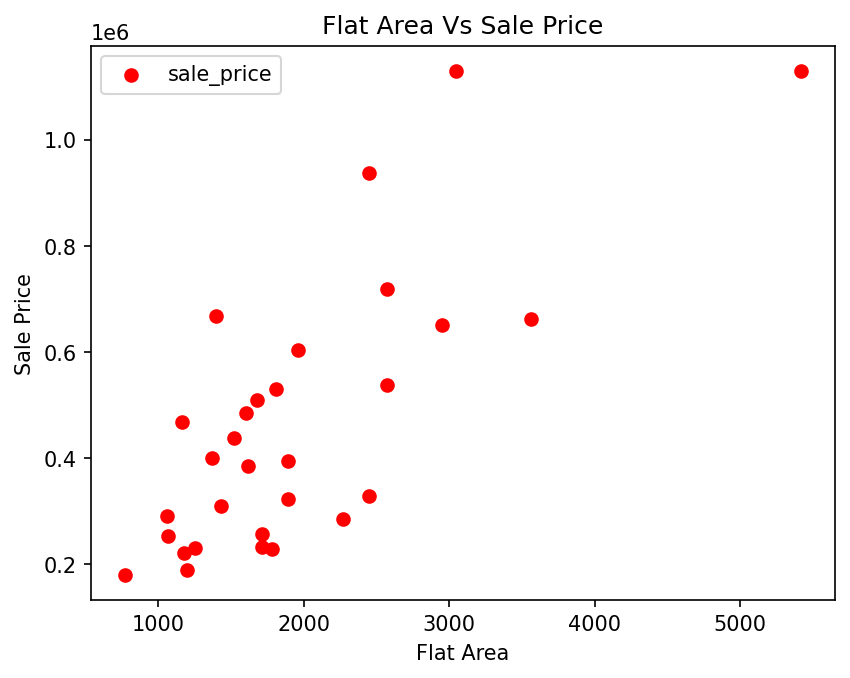

In [10]:
#for better understding we plot matplotlib

plt.figure(dpi=150)
plt.scatter(sample_data.flat_area,sample_data.sale_price,color='red',label='sale_price')
plt.xlabel("Flat Area")
plt.ylabel("Sale Price")
plt.title("Flat Area Vs Sale Price")
plt.legend()
plt.show()

In [ ]:
#step1:build the mean regression modelto predict the sale price of the new house

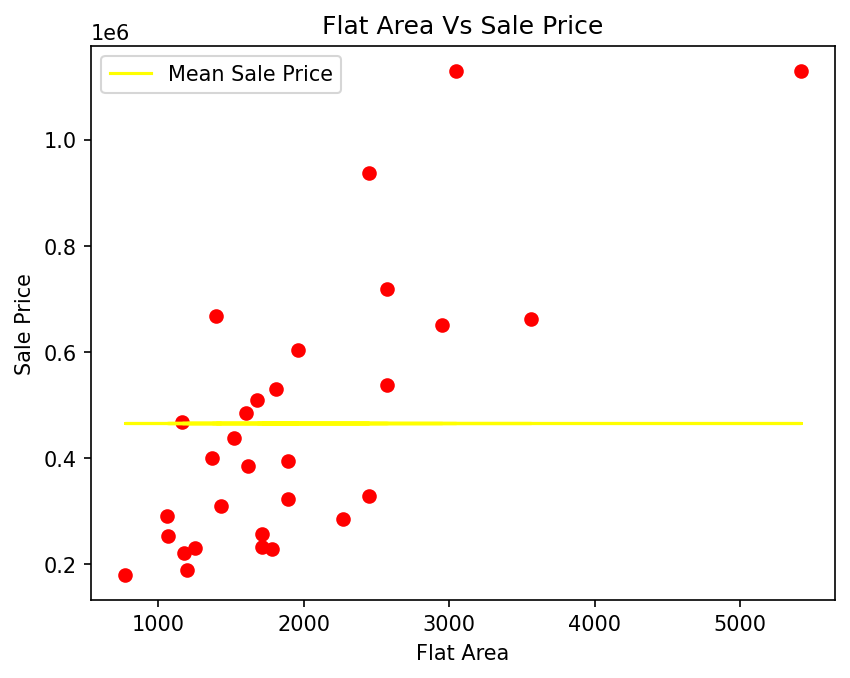

In [12]:
sample_data['mean_sale_price']=sample_data.sale_price.mean()



plt.figure(dpi=150)
plt.scatter(sample_data.flat_area,sample_data.sale_price,color='red')
plt.plot(sample_data.flat_area,sample_data.mean_sale_price,color='yellow',label='Mean Sale Price')
plt.xlabel("Flat Area")
plt.ylabel("Sale Price")
plt.title("Flat Area Vs Sale Price")
plt.legend()
plt.show()

In [ ]:
#yellow  line represent the average sale price of all the house in the dataset

In [ ]:
#module 5.2.3
#cost function curve


Text(0.5, 1.0, 'Slope 0 with MSE 281372081125.0')

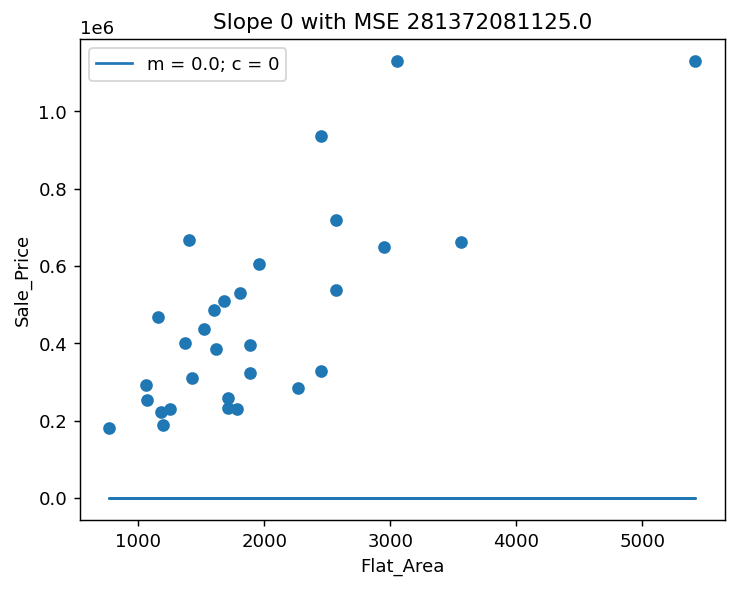

In [14]:
from sklearn.metrics import mean_squared_error as mse
c = 0
m = 0

line = []

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)

plt.figure(dpi = 130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 0.0; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE = mse(sample_data.sale_price, line)
plt.title("Slope "+str(m)+" with MSE "+ str(MSE))

In [ ]:
#step2-->increase the slope of the line and observe the result(just change c from 0 to 50)

Text(0.5, 1.0, 'Slope 50 with MSE 184728400708.33334')

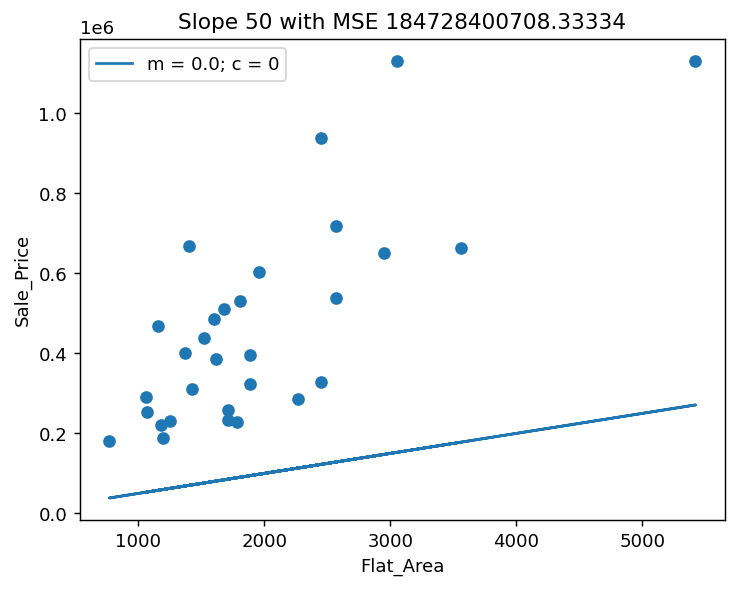

In [15]:
c = 0
m = 50

line = []

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)

plt.figure(dpi = 130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 0.0; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE = mse(sample_data.sale_price, line)
plt.title("Slope "+str(m)+" with MSE "+ str(MSE))

In [ ]:
#lets make save our time by automate this

In [16]:
def slope_Error( slope, intercept ,  sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [17]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error( slope = i, intercept = 0, sample_data = sample_data)
    Cost.append(cost)

In [22]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'slope' : slope,
    'Cost' : Cost
})
Cost_table.tail()

,slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


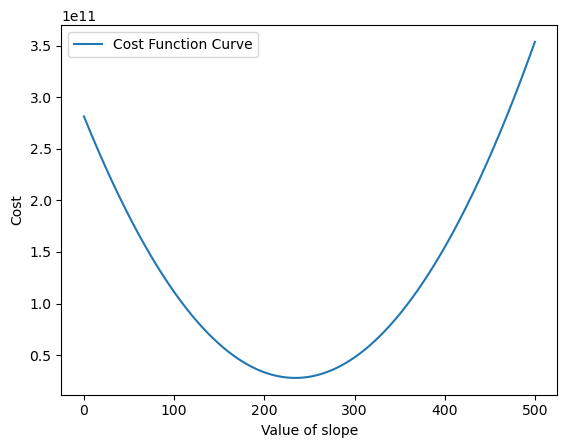

In [19]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [ ]:
#for intercept(we keep slope constant 234)

In [25]:
new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

234.3

In [26]:
def intercept_Error( slope, intercept ,  sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [27]:
intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = intercept_Error( slope = 234, intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [28]:
Cost_table = pd.DataFrame({
    'intercept' : intercept,
    'Cost' : Cost
})
Cost_table.head()

,intercept,Cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10


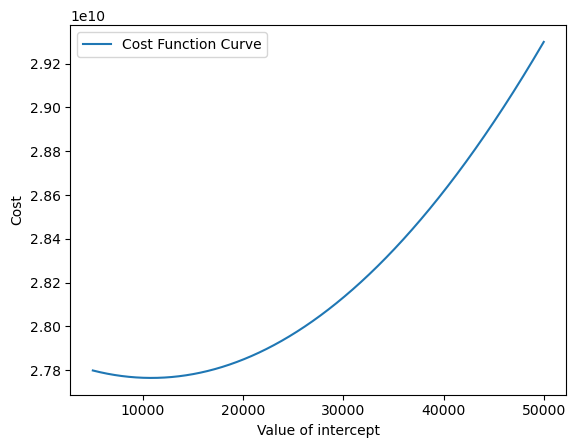

In [29]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [30]:
#to find optimumvalue of c
new_intercept = Cost_table['intercept'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_intercept[0]

10834

In [ ]:
#let repeat of finidng the optimum value of m,but c=10834

In [31]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error( slope = i, intercept = 10834, sample_data = sample_data)
    Cost.append(cost)

In [32]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'slope' : slope,
    'Cost' : Cost
})
Cost_table.tail()

,slope,Cost
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


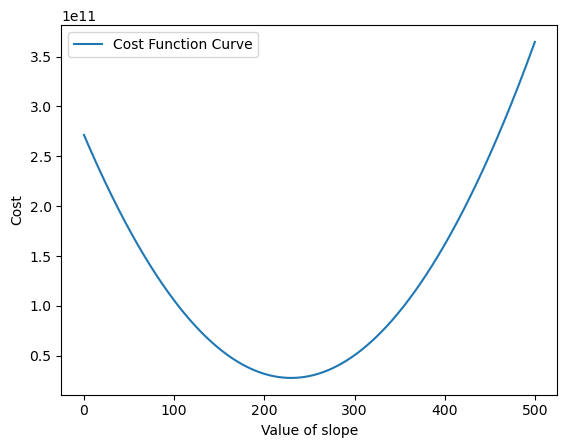

In [33]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [ ]:
#to find new optimum value of c with slope 229.7(as same procedure done ealier)

In [34]:
intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = intercept_Error( slope = 229.7, intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [35]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'intercept' : intercept,
    'Cost' : Cost
})
Cost_table.head()

,intercept,Cost
0,5000,2.781305e+10
1,5001,2.781302e+10
2,5002,2.781299e+10
3,5003,2.781296e+10
4,5004,2.781293e+10


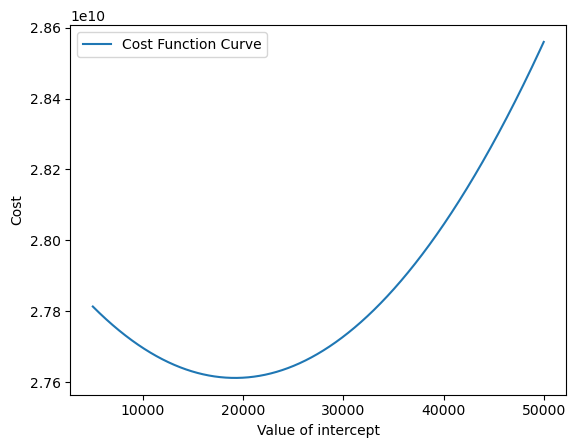

In [36]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [37]:
new_intercept = Cost_table['intercept'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_intercept[0]

19199